<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_out_2020/blob/main/PSD_GRAIN_NOT_GRAIN_nov_13_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020

from Get_PSDArea import PSDArea
from histogram import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020


In [6]:
!ls

Areas_ImageJ.csv		 imageJ_jpg.zip
Areas_ImageJ.xlsx		 IMAGEJ_Zuados.zip
Doutorado			 PSD_GRAIN_NOT_GRAIN_out_09_2020.ipynb
GetBetterSegm.py		 PSD_GRAIN_NOT_GRAIN_out_19_2020.ipynb
Get_PSDArea.py			 PSD_GRAIN_NOT_GRAIN_out_28_2020.ipynb
Histogram_PSD_out_19_2020.ipynb  PSD_USA_ROTINAS_out_05_2020.ipynb
Histogram_PSD_out_23_2020.ipynb  __pycache__
histogram.py			 README.md


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado


In [8]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [10]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

fatal: destination path 'marquesgabi_set_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020


In [11]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [12]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [13]:
df=Segmenta(img)


In [14]:
print(df)

    Width           0           1  ...         781        782         783
0     184   54.517956   53.300560  ...  109.341194  92.042053   67.657364
1     119   92.979248   87.442909  ...   91.640137  89.868515   88.844292
2     110   63.310074   64.487610  ...   96.864136  97.434052  100.583145
3     183   71.788437   73.715942  ...   80.835281  78.238197   69.501900
4     178   89.475449   80.335449  ...   61.246433  57.591217   50.572407
..    ...         ...         ...  ...         ...        ...         ...
45    126   43.234570   39.061729  ...   52.629631  55.975307   58.839504
46    151   67.369987   71.066223  ...   61.236877  63.755630   63.630718
47    144  109.952164  114.787041  ...    0.000000   0.000000    0.000000
48    180   32.993584   74.000008  ...    0.000000   0.120988    0.535802
49    142   55.274750   53.952785  ...  101.389618  94.064270   99.618729

[150 rows x 785 columns]


In [15]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 13.7670 - accuracy: 0.4490
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5927 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 2.9043 - accuracy: 0.5481
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.2279 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 3.2832 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 2.6032 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6758 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.5452
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.8426
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8426
Epoch 11

In [16]:
# y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


In [17]:
print(confusion_matrix)

Predicted   0   1
Actual           
0          72   0
1           2  73


In [18]:
df.shape

(150, 785)

In [19]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [20]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado


In [21]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [22]:
df=Segmenta(img)

In [23]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 26.9950 - accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 3.5359 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.9529 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5015
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9689 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.5860
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2446 - accuracy: 0.5044
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 3.5588 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 3.6842 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 3.1766 - accuracy: 0.4956
Epoch 11

In [24]:
# print(y_pred.ravel())

In [25]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [26]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [27]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,139,110.821945,110.604362,109.872459,111.563370,115.453957,119.006668,121.960815,124.348480,123.308571,124.294441,125.204224,135.220688,141.177170,143.647842,143.159821,113.672005,224.592712,231.334473,208.465240,200.593811,191.219345,196.846603,165.016541,147.228027,154.278290,165.905640,156.989273,143.077469,112.698662,115.531235,115.863358,115.977936,117.855583,122.143463,124.985191,127.135803,127.905640,129.597061,129.500793,...,158.378021,135.394455,111.836395,72.760368,56.361263,60.225559,64.225868,65.749489,63.890377,62.785149,68.363335,72.122040,85.137726,89.135025,93.537491,83.969666,72.680496,73.126129,66.627350,63.845295,56.915066,47.993580,45.224155,45.128510,48.920135,30.923450,100.965469,132.422333,144.825012,144.314377,120.905380,88.054703,51.493191,59.828266,64.959785,65.074165,66.568192,67.966774,68.516632,72.946121
1,186,71.004395,79.708069,72.399132,64.778587,86.935028,92.872124,123.330444,128.219574,128.626419,128.281662,130.303162,130.141296,130.725525,137.218994,141.407455,150.733154,153.390579,140.938721,102.562035,93.230782,92.303513,91.832703,93.738708,99.541222,115.706566,122.514984,116.938034,117.648407,104.955612,115.654419,116.121864,124.684021,110.212173,88.412888,122.216560,127.245819,132.005554,131.123840,127.642975,...,120.995735,119.785873,125.237152,135.556259,145.583664,150.436020,150.422943,150.723785,139.935028,124.625511,126.451042,119.842194,119.768768,117.118752,111.967522,108.687141,108.661240,110.093765,113.034813,116.918503,120.452202,121.538338,95.645401,61.221298,19.774427,67.149155,139.696854,136.529785,119.374733,120.614182,127.065338,130.316803,140.121292,147.502975,148.223618,144.579956,152.067764,133.476486,117.320969,112.165230
2,181,120.460930,120.903580,113.302681,100.454842,97.937157,101.705170,101.828186,103.882324,106.951256,106.318314,111.944511,121.233002,136.879623,143.246216,139.331619,127.885078,123.931198,118.294388,119.608353,125.265747,112.396080,106.469948,106.003021,94.242821,74.157082,77.127136,76.918198,72.882057,125.161385,123.581512,118.222855,105.771347,99.424477,102.688103,103.243896,103.586014,105.126587,105.662956,112.223129,...,63.172127,59.852451,59.130798,76.505356,89.239769,99.790062,105.460968,110.308685,112.783775,117.273254,117.400421,115.535156,212.645370,132.180801,69.909309,87.043472,86.175217,82.112030,78.369530,74.985443,69.285255,55.492386,43.959190,38.858799,56.541588,66.110710,66.403412,61.932362,59.820030,59.766552,61.722721,87.942314,103.457596,120.115753,119.355858,118.819733,121.403900,121.271057,120.592201,117.588142
3,186,46.693031,51.026253,50.998386,53.253906,57.908436,57.817554,60.681244,50.930050,57.347900,117.491058,152.579834,150.560410,142.475555,122.137939,96.462257,95.549095,108.646088,128.392899,144.032623,128.787842,78.568977,80.913757,91.223732,89.978043,76.308357,74.279686,74.957108,76.945312,50.283966,49.949829,50.258877,51.861835,58.926815,70.545502,82.679390,84.955956,87.640892,99.015854,125.383865,...,147.313339,155.302002,159.340057,109.716042,119.592911,114.808075,101.501793,96.266281,95.919296,88.727264,94.355537,107.336464,99.585968,95.346176,92.200027,89.344910,88.548973,116.687256,132.474518,126.400520,115.272522,74.230095,120.017113,130.189850,135.077133,134.406769,133.537750,131.888794,140.653152,151.938370,174.695343,175.560883,116.905655,112.465393,101.011795,100.116196,104.111008,100.631760,98.731766,99.631287
4,135,69.723122,71.743423,75.124985,74.212280,71.575027,73.013824,73.763290,69.420685,65.376129,64.034233,54.535965,46.021946,34.277691,32.140850,41.412891,52.945950,60.709576,61.123837,60.253109,62.702049,63.206799,61.179913,59.687401,57.966797,39.604385,13.569821,18.822058,10.439944,63.328609,69.666275,66.326309,70.063263,

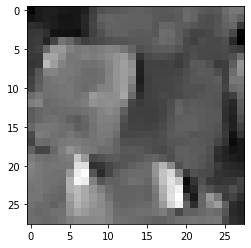

In [28]:
Size=28
qual_img=7
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [29]:
df_getBetter = GetBetter(img)
#df_getBetter = GetBetter(data)

In [31]:
df_getBetter.shape

(50, 730)

In [30]:
qual_img =21
data=np.array(df_getBetter.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
plt.imshow(img28, cmap = "gray")


ValueError: ignored

In [ ]:
plt.imshow(Foto, cmap = "gray")


In [ ]:
plt.imshow(img28, cmap = "gray")

In [ ]:
mean_value = np.mean(img)
img_new = img.copy()

In [ ]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [ ]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

In [ ]:
Area_All, Diameter_All=PSDArea(df_size) 


In [ ]:
df_size.shape

In [ ]:
# print(Area_All)
print(Diameter_All)

In [ ]:
diam = Diameter_All.copy()
PSD_value = PSD(diam)
print(PSD_value)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
df_imageJ = pd.read_csv(PSD_imageJ)
print(df_imageJ.head(3))

In [ ]:
df_imageJ.shape

In [ ]:
PSD_new = PSD(PSD_new['Diam'])
print(PSD_new)

In [ ]:
Diam = PSD_value # foto que esta fazendo
Diam1 = PSD_new # imageJ

plt.hist([Diam,Diam1], 3)

In [ ]:
Diam

In [ ]:
Diam1

In [32]:
730**0.5

27.018512172212592